## Resolução da Lista de exercícios (Avaliação ENGJ22)

Aluno: Cleiton Cajueiro de Souza

## QUESTÃO 1


Matriz Variância-Covariância dos parâmetros (X):
[[ 3.60863391e+07  9.37875055e-01 -4.27417016e+00]
 [ 9.37875052e-01  2.10848340e-07 -1.23324369e-07]
 [-4.27417016e+00 -1.23324370e-07  5.07048446e-07]]

Matriz Variância-Covariância dos parâmetros (Y):
[[ 2.26384270e+08  5.88367134e+00 -2.68136063e+01]
 [ 5.88367132e+00  1.32273732e-06 -7.73663883e-07]
 [-2.68136063e+01 -7.73663885e-07  3.18092095e-06]]


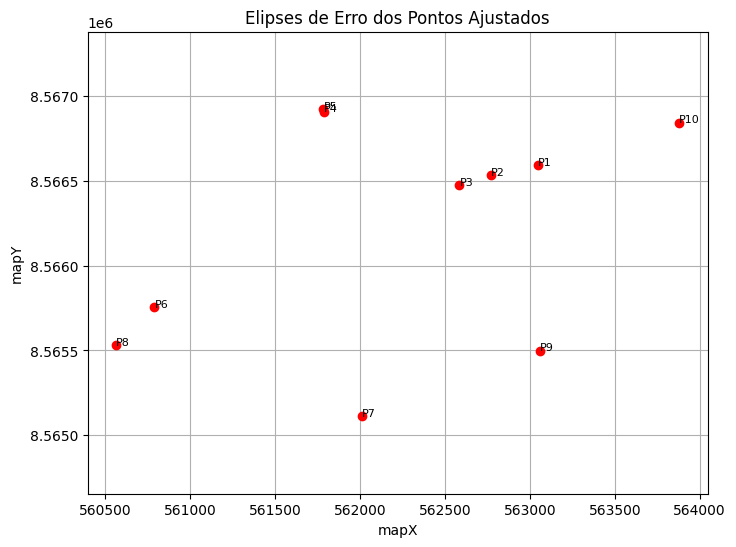

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

url = 'https://raw.githubusercontent.com/cleitoncajueiro/ENGJ22---Ajustamentos/main/pontos%20-%20Q1.csv'
df = pd.read_csv(url)

X = df['sourceX'].values
Y = df['sourceY'].values
x = df['mapX'].values
y = df['mapY'].values

# modelo de transformação afim (x = a1 + a2*X + a3*Y)
def modelo_afim(X, Y):
    A = np.vstack([np.ones_like(X), X, Y]).T
    return A

A = modelo_afim(X, Y)

# parâmetros para mapX = a1 + a2*imgX + a3*imgY
params_x = np.linalg.lstsq(A, x, rcond=None)[0]
params_y = np.linalg.lstsq(A, y, rcond=None)[0]

# Coordenadas ajustadas
x_ajust = A @ params_x
y_ajust = A @ params_y

# Cálculo dos resíduos
vx = x - x_ajust
vy = y - y_ajust

# Variância dos resíduos e matriz variância-covariância dos parâmetros
n = len(x)
u = len(params_x)  # número de parâmetros
dof = n - u        # graus de liberdade

sigma0_sq_x = (vx.T @ vx) / dof
sigma0_sq_y = (vy.T @ vy) / dof

# Matriz normal
N = A.T @ A
N_inv = np.linalg.inv(N)

# Matriz variância-covariância dos parâmetros
Cx = sigma0_sq_x * N_inv
Cy = sigma0_sq_y * N_inv

print("\nMatriz Variância-Covariância dos parâmetros (X):")
print(Cx)

print("\nMatriz Variância-Covariância dos parâmetros (Y):")
print(Cy)

# Elipses de erro para os pontos ajustados
def calcula_elipse(vx, vy):
    sigma0 = np.sqrt((np.sum(vx**2) + np.sum(vy**2)) / (2 * dof))
    return sigma0

sigma0 = calcula_elipse(vx, vy)

# Matriz variância-covariância dos pontos ajustados
Qxx = A @ N_inv @ A.T
Cxy = sigma0**2 * Qxx

# Plotar os pontos com elipses de erro
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Elipses de Erro dos Pontos Ajustados')
ax.set_xlabel('mapX')
ax.set_ylabel('mapY')
ax.grid(True)

for i in range(len(x_ajust)):
    cov = sigma0**2 * Qxx[i, i]
    ellipse = Ellipse((x_ajust[i], y_ajust[i]),
                      width=2*np.sqrt(Cxy[i, i]),
                      height=2*np.sqrt(Cxy[i, i]),
                      edgecolor='blue', facecolor='none', lw=1)
    ax.add_patch(ellipse)
    ax.plot(x_ajust[i], y_ajust[i], 'ro')
    ax.text(x_ajust[i]+0.2, y_ajust[i]+0.2, f'P{i+1}', fontsize=8)

plt.axis('equal')
plt.show()

## Questão 2


Matriz variância-covariância dos parâmetros:
 [[ 3.10500996e+14 -2.07455792e+13 -3.83592101e+07  1.60889858e+07
   2.46975490e+06  1.56660528e+18  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.78685959e+12  2.21004091e+13  8.50912451e+05 -4.46623388e+05
  -1.31792192e+06 -9.27488880e+19 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [-3.83500241e+07  2.57641418e+06  4.74546943e+00 -2.04595493e+00
  -3.06118045e-01 -2.53946379e+11 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.60190116e+07 -1.17787600e+06 -2.03778633e+00  1.27806250e+00
   1.35630707e-01  5.41335874e+11 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.65468511e+06 -1.37454804e+06 -2.05400773e-01  9.32156745e-02
   8.69728370e-02  5.42207217e+12  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.0000

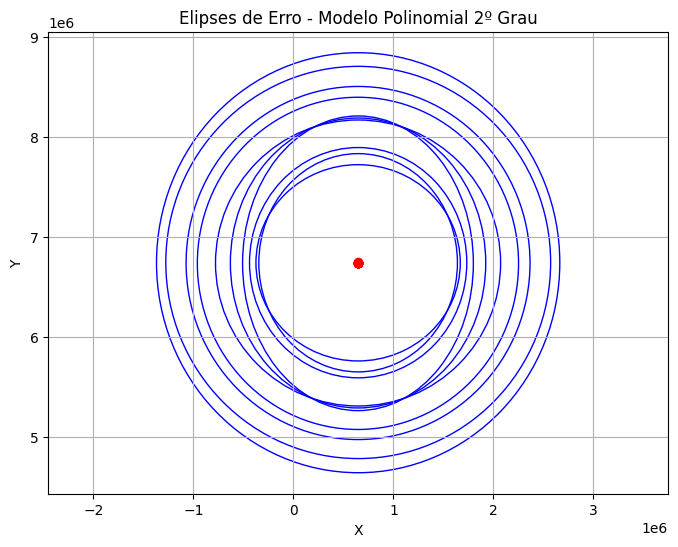

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from matplotlib.patches import Ellipse

url = "https://raw.githubusercontent.com/cleitoncajueiro/ENGJ22---Ajustamentos/main/pontos%20-%20Q2.csv"
df = pd.read_csv(url)

x = df['mapX'].values
y = df['mapY'].values
X = df['sourceX'].values
Y = df['sourceY'].values
n = len(x)

A = np.zeros((2*n, 12))
L = np.zeros((2*n, 1))

for i in range(n):
    xi, yi = x[i], y[i]
    A[2*i] =   [xi, yi, xi*yi, xi**2, yi**2, 1, 0, 0, 0, 0, 0, 0]
    A[2*i+1] = [0, 0, 0, 0, 0, 0, xi, yi, xi*yi, xi**2, yi**2, 1]

    L[2*i] = X[i]
    L[2*i+1] = Y[i]

# Ajuste por mínimos quadrados
AtA = A.T @ A
AtL = A.T @ L
X_ajust = inv(AtA) @ AtL  # Parâmetros ajustados

L_ajust = A @ X_ajust
V = L - L_ajust
gl = 2*n - 12  # graus de liberdade
sigma0_2 = (V.T @ V) / gl  # variância do ajuste
Cov_X = sigma0_2[0, 0] * inv(AtA)

print("\nMatriz variância-covariância dos parâmetros:\n", Cov_X)

# Cálculo das elipses de erro nas coordenadas ajustadas
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Elipses de Erro - Modelo Polinomial 2º Grau")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)

for i in range(n):
    xi, yi = x[i], y[i]

    # Construção da Jacobiana J para propagação de erro
    J = np.array([
        [xi, yi, xi*yi, xi**2, yi**2, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, xi, yi, xi*yi, xi**2, yi**2, 1]
    ])

    # Cálculo da matriz de covariância da posição
    Cov_i = J @ Cov_X @ J.T
    vals, vecs = np.linalg.eigh(Cov_i) #Autovalores e Autovetores

    # Semi-eixos e ângulo da elipse
    width, height = 2 * np.sqrt(vals)  # 1-sigma
    angle = np.degrees(np.arctan2(vecs[1, 1], vecs[0, 1]))

    X_adj = L_ajust[2*i][0]
    Y_adj = L_ajust[2*i+1][0]

    ellipise = Ellipse((X_adj, Y_adj), width=width, height=height, angle=angle, edgecolor='blue', facecolor='none')
    ax.add_patch(ellipise)
    ax.plot(X_adj, Y_adj, 'ro')

plt.axis('equal')
plt.show()

### QUESTÃO 3 - Pesquisar sobre calibração de câmeras métricas e elaborar um texto apontando o papel do ajustamento de observações em processos de calibração.(max.1000 palavras)

Câmeras métricas são câmeras fotográficas projetadas para aplicações técnicas voltadas a mensuração de superfícies tridimensionais, como levantamentos fotogramétricos e mapeamentos de alta precisão. São usadas para capturar imagens que serão processadas com base em modelos matemáticos, permitindo a extração de coordenadas dos objetos fotografados. A partir das imagens capturadas por essas câmeras, pode-se gerar produtos como ortofoto, nuvem de pontos, MDT (Modelo Digital do Terreno) e MDS (Modelo Digital de Superfície). Esses produtos só são viáveis porque a câmera passa por um processo criterioso de calibração, que consiste na determinação de seus parâmetros internos, como distância focal, posição do ponto principal e coeficientes de distorção da lente.

No entanto, esses parâmetros não são fornecidos prontos. Eles precisam ser estimados com base em observações, geralmente obtidas por meio de ensaios fotográficos em alvos de coordenadas conhecidas, os chamados alvos de controle. É nesse contexto que o ajustamento de observações geodésicas se torna fundamental, pois serve de base para interpretar essas medições e extrair os parâmetros corretos da câmera.

Durante uma calibração, diversas fotos são tiradas de um painel contendo pontos cujas posições foram previamente determinadas com precisão. Cada ponto visível em cada imagem gera uma observação, representando sua coordenada na imagem. A partir desses dados, utiliza-se um modelo matemático, normalmente a equação colinear, que relaciona os pontos 3D do mundo real às suas projeções 2D na imagem. Contudo, essas observações sempre apresentam erros, sejam instrumentais, humanos ou ambientais.

É nesse momento que o ajustamento de observações geodésicas se torna indispensável. Sua função é minimizar os efeitos dos erros aleatórios e identificar possíveis erros sistemáticos, fornecendo os valores mais prováveis para os parâmetros internos da câmera. Aplica-se, por exemplo, o Método dos Mínimos Quadrados, que ajusta as observações de modo a minimizar a soma dos quadrados dos resíduos (as diferenças entre o valor observado e o valor ajustado). Esse processo garante a confiabilidade da calibração.

Além disso, o ajustamento permite calcular a matriz variância-covariância das estimativas. Essa matriz fornece informações importantes sobre a precisão dos parâmetros calibrados e a correlação entre eles. Por exemplo, é possível avaliar se uma pequena variação na posição do ponto principal afeta significativamente a estimativa da distância focal. Essa análise é importante para efetuar futuros levantamentos, uma vez que a qualidade da calibração impacta diretamente na precisão do mapeamento.

Outro aspecto relevante é que, por meio do ajustamento, é possível detectar distorções ópticas da lente, como as distorções radial e tangencial, e modelá-las adequadamente. Essas distorções, se não corrigidas, podem causar desvios significativos nas posições dos pontos na imagem. Durante a calibração, elas são incluídas como parâmetros no modelo matemático, e o ajustamento auxilia na estimativa de seus valores com base nas observações.

Portanto, o ajustamento de observações geodésicas desempenha um papel essencial na calibração de câmeras métricas, garantindo a precisão dos parâmetros internos e a correção de distorções. Ao minimizar erros e fornecer estimativas confiáveis, esse processo assegura a qualidade dos produtos fotogramétricos. Por isso, efetuar o ajustamento na calibração de câmeras métricas, é indispensável para obter resultados precisos e consistentes em levantamentos geodésicos e fotogramétricos.


### QUESTÃO 4 - Analise o relatório de serviço aerofotogramétrico a seguir e faça um parecer solicitando informações que possam pautar a avaliação geométrica dos produtos entregues, assim como a qualidade a aerotriangulação dos blocos executados. (max.1000 palavras)
[https://prefeitura.cachoeiro.es.gov.br/arquivos_sql/17/Relatorio-de-Recobrimento-Aerofotogrametrico.pdf](https://prefeitura.cachoeiro.es.gov.br/arquivos_sql/17/Relatorio-de-Recobrimento-Aerofotogrametrico.pdf)

Ao analisar o relatório de serviço aerofotogramétrico, percebi a falta de informações importantes que permitam a avaliação geométrica dos produtos entregues. O relatório demonstrou adequação técnica quanto à seleção de equipamentos, contudo, não se aprofunda em tópicos relevantes para atestar plenamente a conformidade com o PEC Classe A, como foi declarado.

Quanto à calibração do sensor, observa-se que o certificado anexado data de 2013, sem indicação de recalibração prévia ao voo. Considerando os significativos coeficientes de distorção radial apresentados (atingindo 43,38 µm), é recomendável a apresentação de relatório atualizado que comprove a verificação dos parâmetros internos antes da execução do projeto.

.

Em relação à aerotriangulação, solicito as seguintes informações, que considero essenciais, mas que carecem neste relatório:

•	Quantidade e distribuição espacial dos pontos de controle (GCPs) e verificação (check points);

•	Métodos e precisão de coleta dos pontos de apoio;

•	Estatísticas completas do ajustamento (RMSE em XYZ e matriz variância-covariância);

•	Procedimentos adotados para identificação e tratamento de erros grosseiros.

.

Sobre a execução do voo, solicito a complementação com:

•	Relatório de amarração automática contendo densidade média de tie points;

•	Taxas de rejeição e critérios de filtragem aplicados;

•	Confirmação das superposições efetivamente alcançadas (80% longitudinal e 40% lateral).

.

Para os produtos laser, solicito a apresentação de:

•	Relatório detalhado de classificação da nuvem de pontos;

•	Métodos de filtragem aplicados;

•	Validação da densidade efetiva de pontos/m².

.

Por fim, é fundamental a apresentação de relatório de validação independente, com comparação entre coordenadas modeladas e pontos de controle não utilizados no processo de aerotriangulação. Tal documento permitiria avaliar objetivamente a acurácia posicional final dos produtos.
